In [1]:
print('Hare krishna')

Hare krishna


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

/var/folders/qy/r5l0nk2j6t986bf_tbl5vfz80000gn/T/ipykernel_15475/1274060260.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='quality',y='alcohol',data=df,palette='viridis')
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 38.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


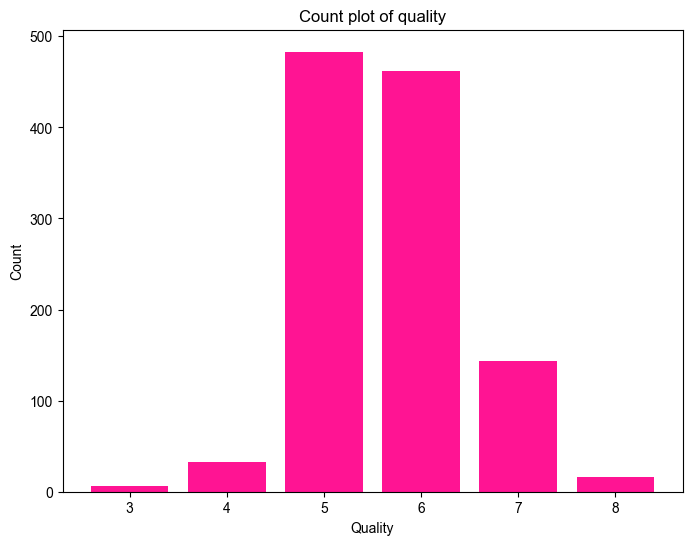

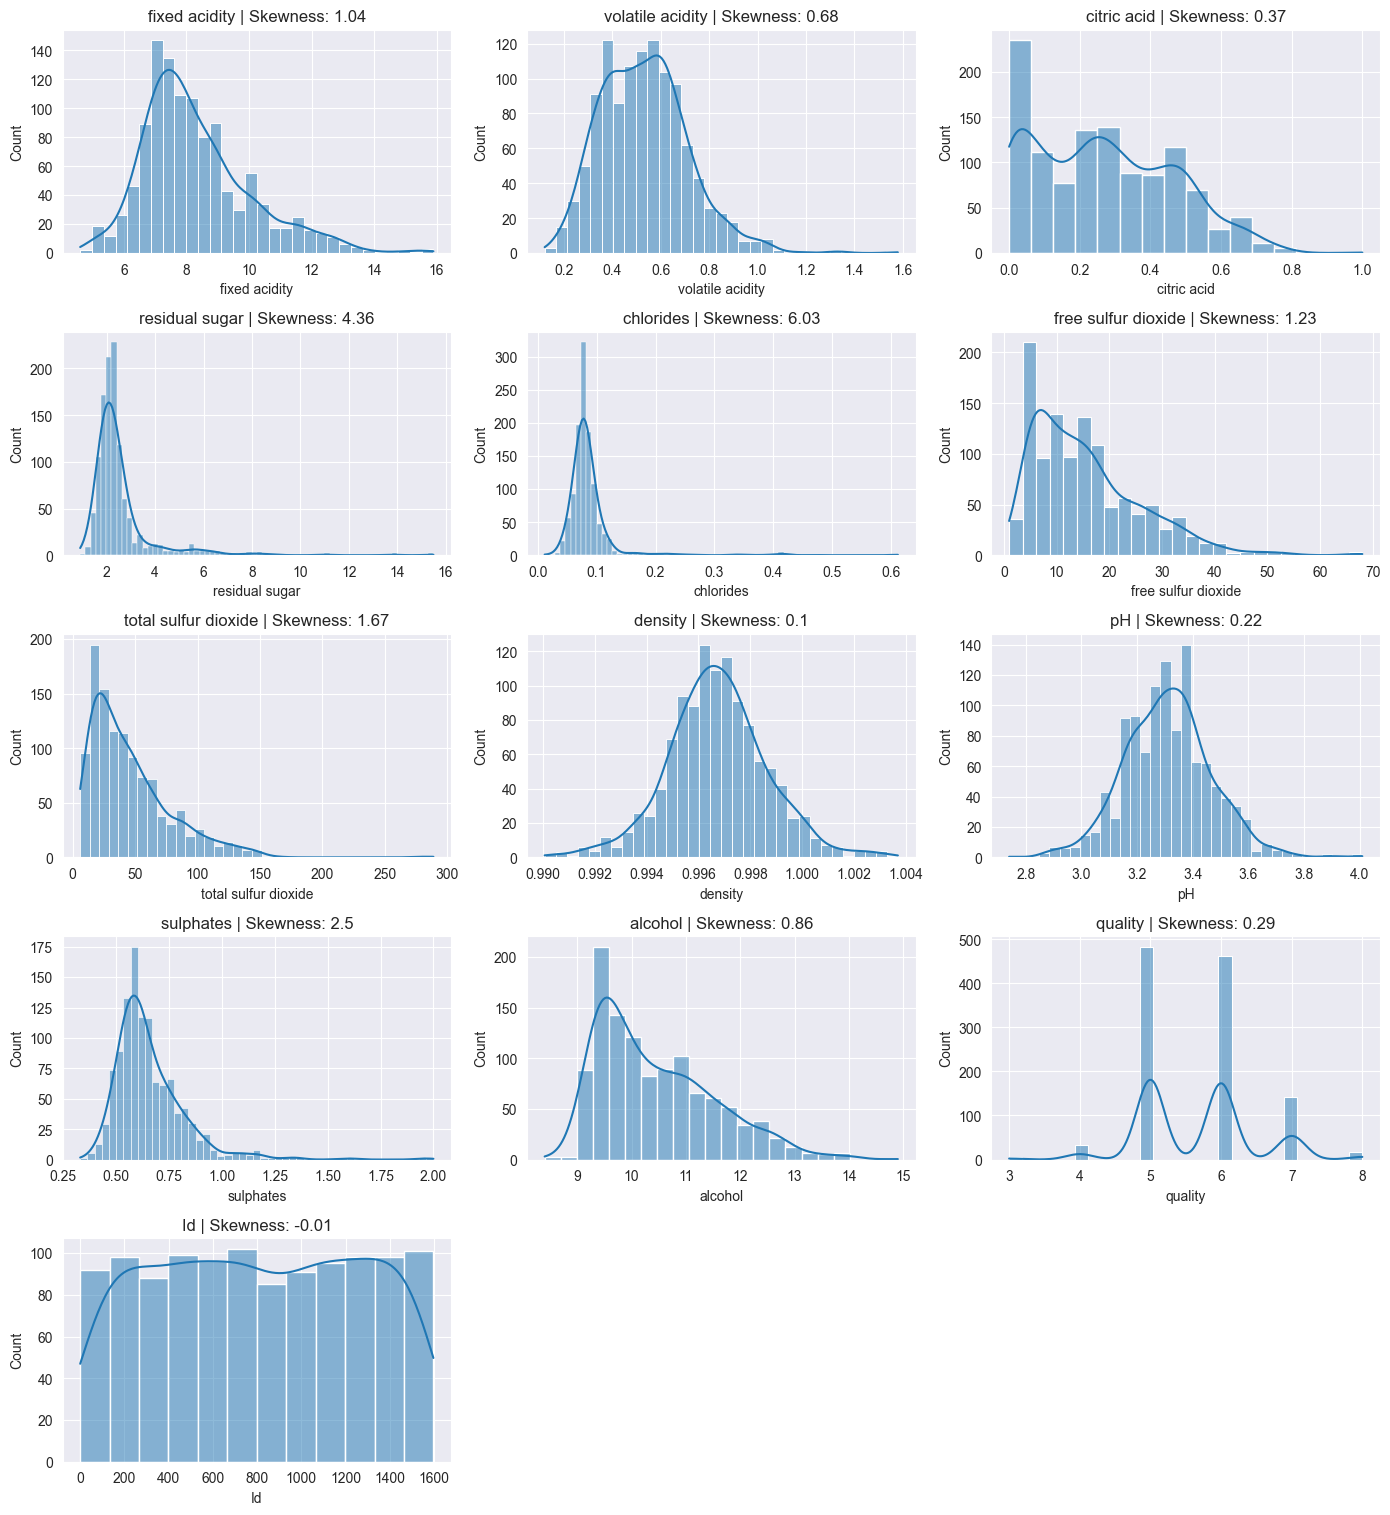

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 38.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


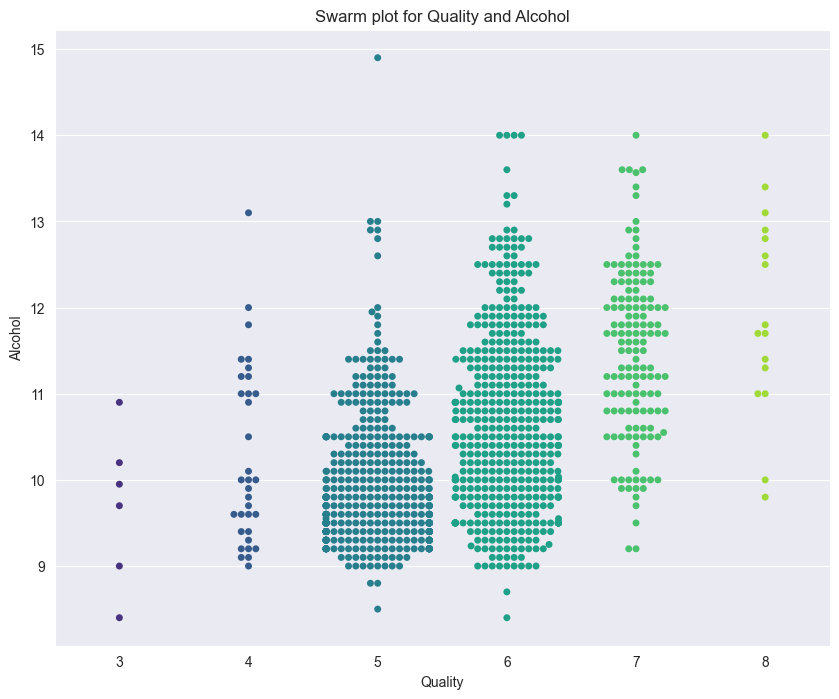

<Figure size 800x400 with 0 Axes>

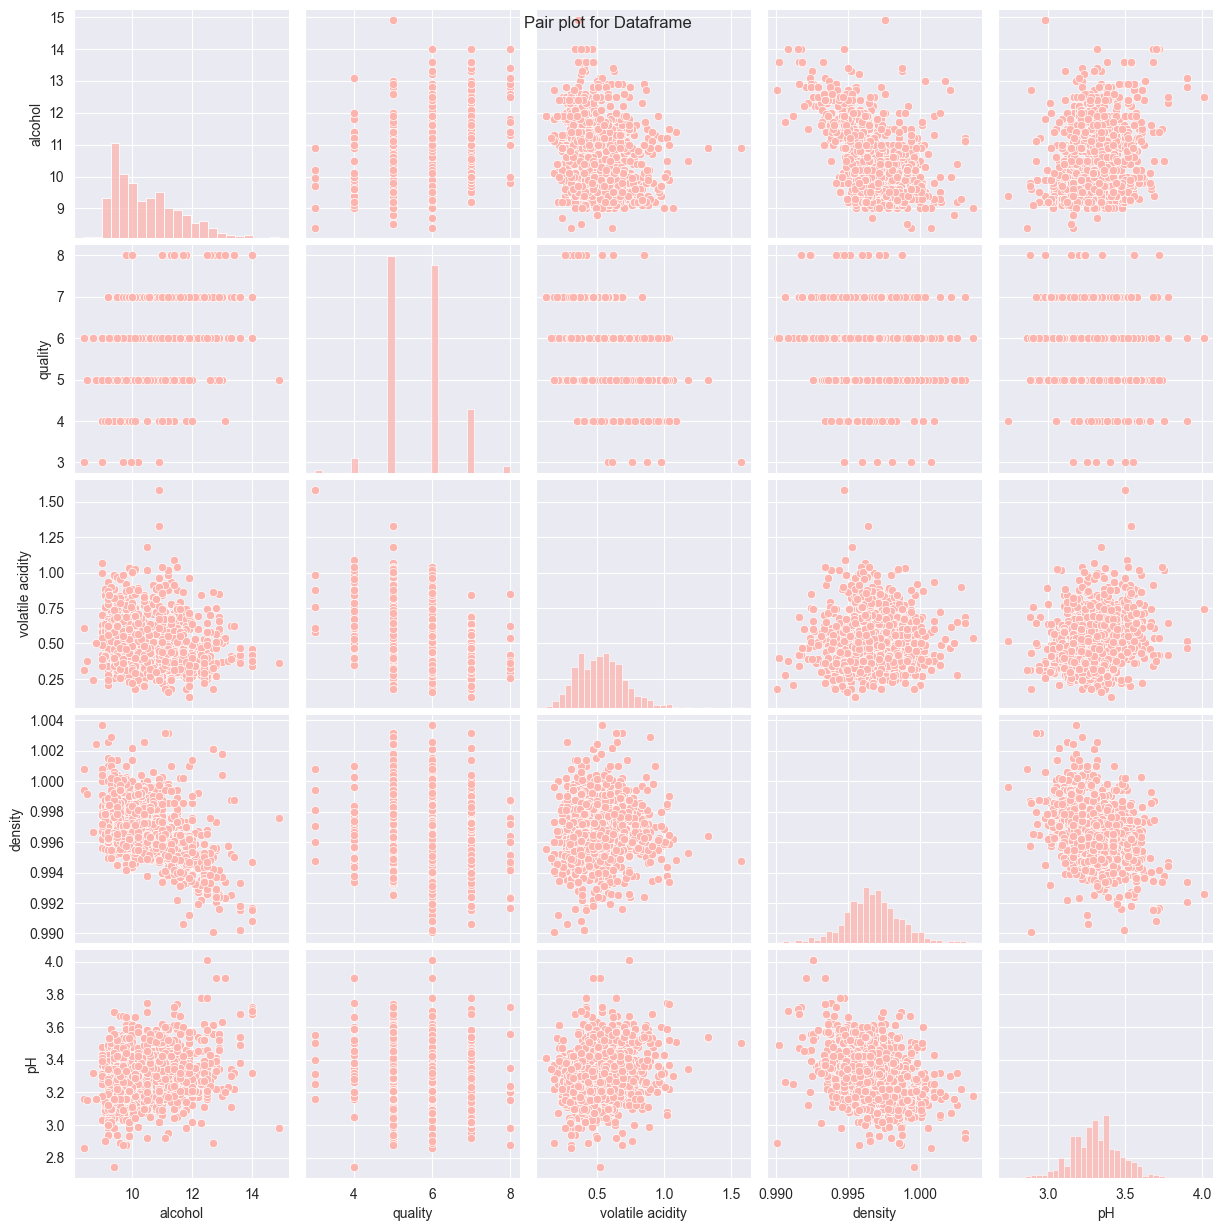

In [2]:
import pandas as pd #table data handle krne ke liye
import numpy as np  #no. and arrays ke liye
import matplotlib.pyplot as plt #graph and plots banane ke liye
import seaborn as sns #advanced beautiful plot banane ke liye
import warnings as wr #unnecessary warnings hide krne ke liye
wr.filterwarnings('default')

#READING DATASET

df = pd.read_csv('WineQT.csv') #comma seperated values
print(df);

#ANALYZING 
print(df.head()) #top 5 values
print(type(df.shape)) #shape tuple hai 
print(df.shape) #(rows,col) #data kitna hai check krne ke liye
#rows are observation and col are features

print(df.info()) #checks if any values are missing and memory usage

print(df.describe()) #mean std deviation and quartiles etc ye sab deta hai 

print(df.columns.tolist()) #col ko list mein convert krne ke liye


#CHECKING MISSING VALUES
print(df.isnull().sum()) #returns total no of null values per cols

#CHECK FOR DUPLICATES
print(df.nunique()) #no. of unique values per cols

#UNIVARIATE ANALYSIS
#observation consist only one varible 

quality_counts = df['quality'].value_counts()
print(quality_counts) #har unique value kitni baar ayi hai 


plt.figure(figsize=(8,6))
plt.bar(quality_counts.index,quality_counts,color='deeppink')
#quality_counts mein (index,values hoti hain) lekin matplot lib bs values uthata hai  

plt.title('Count plot of quality')
plt.xlabel('Quality')
plt.ylabel('Count')
# plt.show()

#  Kernel density plot for understanding variance in the dataset
#low variance data kitna chipka hai 
#high variance data kitna door hai

sns.set_style('darkgrid')
numerical_cols = df.select_dtypes(include=['int64','float64']).columns #sirf numerical cols select krne ke liye

plt.figure(figsize=(14,len(numerical_cols)*3)) #inches

for idx, feature in enumerate(numerical_cols,1):
    plt.subplot(len(numerical_cols),3,idx) #subplots(nrow,ncol,position) ye rxc ka grid banataa aur idx se start hota hai 
    #subplot layout decide krta hai 
    sns.histplot(df[feature],kde=True) #hisplot data plot krta hai ::::: KDE ek smooth curve hota hai jo data ka distribution dikhata hai
    plt.title(f'{feature} | Skewness: {round(df[feature].skew(),2)}') #skewness mtalb data kitna jhuka hua hai 2 decimal places tak skewness value calculate krni hai

plt.tight_layout() #subplots ke bich adjust krne ke liye
# plt.show()


# Swarm Plot for showing the outlier in the data
# Swarm plot categorical vs numerical data ka distribution dikhata hai jahan har data point visible hota hai, isliye outliers easily detect hote hain.

plt.figure(figsize=(10,8))
sns.swarmplot(x='quality',y='alcohol',data=df,palette='viridis')
plt.title('Swarm plot for Quality and Alcohol')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
# plt.show()





#BIVARIATE ANAYLSIS
#do variables ke bich pattern, dependency, aur relationship check krna
#how changes in one variable affect the other variable



# Pair Plot for showing the distribution of the individual variables
important_cols = [
    'alcohol',
    'quality',
    'volatile acidity',
    'density',
    'pH'
]

sns.set_palette('Pastel1')
plt.figure(figsize=(8,4))
sns.pairplot(df[important_cols])
#pair all vs all ka graph plot krta hai 
plt.suptitle('Pair plot for Dataframe')
plt.show()

#histogram jo isme hote hain vo single variable ka distribution dikhate hain
#scatterplot offdiagonal b/w two var reaveals pattern and corelation



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


<Axes: xlabel='quality', ylabel='alcohol'>

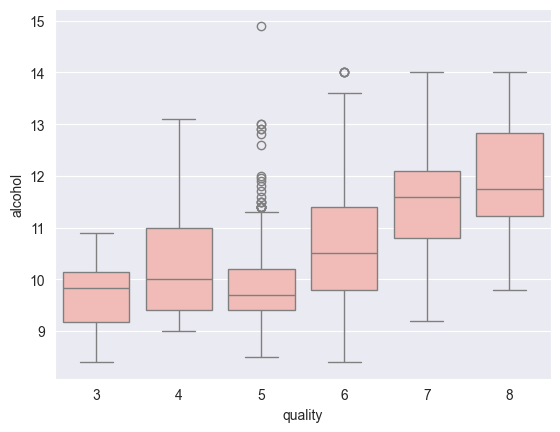

In [3]:
# Box Plot for examining the relationship between alcohol and Quality
sns.boxplot(x='quality',y='alcohol',data=df)

Interquartile Range (IQR)
Quartiles divide a data set into four equal parts, each containing 25% of the data. 

Q1 : middle no b/w the smallest and median dataset.
Q2 : median
Q3 : middle value b/w the highest and median


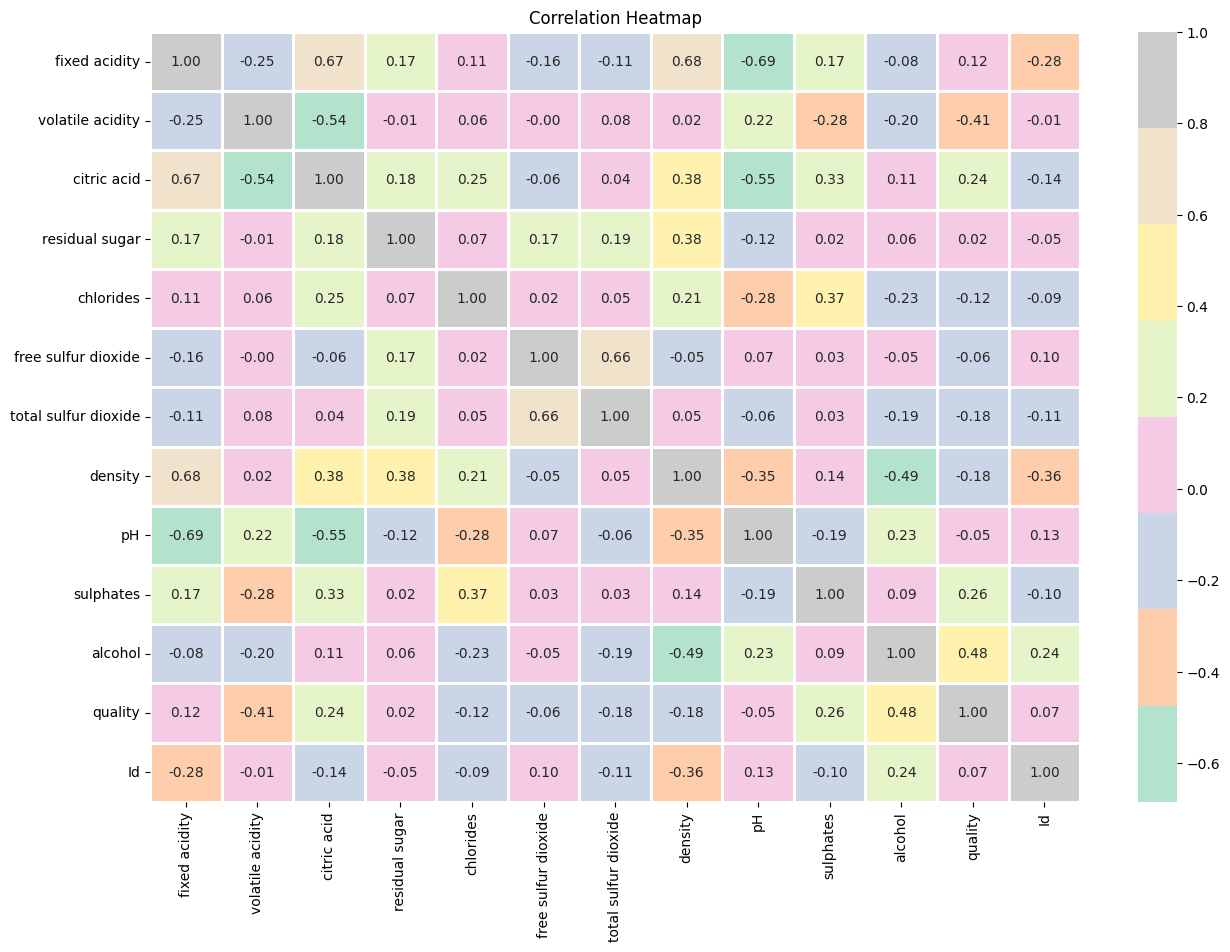

In [7]:
#MULTIVARIATE ANAYLSIS
#interaction b/w 3 or more dataset at the same time.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv('WineQT.csv')
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2) #annot true yani no bhi likh dega, fmt no ka format hai aur cmap color
plt.title('Correlation Heatmap')
plt.show() 

value close to +1 shows strong positive corelation